<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/missing_data_using_prediction_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [758]:
#importing EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [759]:
#importing file
df=pd.read_csv("/content/lowflow.csv")
df

,DATE,SF,MIT,MXT,PPT,SM,INDEX
0,01-01-1990,3.091,21.86,31.14,0.10,0.58,1
1,01-02-1990,3.321,21.89,31.23,0.01,0.58,2
2,01-03-1990,11.190,20.66,31.03,0.00,0.57,3
3,01-04-1990,4.506,20.75,30.62,0.00,0.56,4
4,01-05-1990,3.096,20.23,27.61,0.00,0.56,5
...,...,...,...,...,...,...,...
2917,12-27-1997,12.260,20.58,27.87,0.01,0.88,2918
2918,12-28-1997,9.400,20.33,27.78,0.00,0.87,2919
2919,12-29-1997,9.776,20.20,28.18,0.00,0.86,2920
2920,12-30-1997,8.200,21.05,28.57,0.00,0.84,2921


In [760]:
#top few rows of a dataset
df.head()

,DATE,SF,MIT,MXT,PPT,SM,INDEX
0,01-01-1990,3.091,21.86,31.14,0.10,0.58,1
1,01-02-1990,3.321,21.89,31.23,0.01,0.58,2
2,01-03-1990,11.190,20.66,31.03,0.00,0.57,3
3,01-04-1990,4.506,20.75,30.62,0.00,0.56,4
4,01-05-1990,3.096,20.23,27.61,0.00,0.56,5


In [761]:
#bottom few rows of a dataset
df.tail()

,DATE,SF,MIT,MXT,PPT,SM,INDEX
2917,12-27-1997,12.260,20.58,27.87,0.01,0.88,2918
2918,12-28-1997,9.400,20.33,27.78,0.00,0.87,2919
2919,12-29-1997,9.776,20.20,28.18,0.00,0.86,2920
2920,12-30-1997,8.200,21.05,28.57,0.00,0.84,2921
2921,12-31-1997,9.093,19.54,27.76,0.00,0.84,2922


In [762]:
#total number of rows and columns
df.shape

(2922, 7)

In [763]:
#data types
df.dtypes

DATE      object
SF       float64
MIT      float64
MXT      float64
PPT      float64
SM       float64
INDEX      int64
dtype: object

In [764]:
#missing value
df.isna().sum()

DATE       0
SF       383
MIT        0
MXT        0
PPT        0
SM         0
INDEX      0
dtype: int64

In [765]:
# generate descriptive statistics of the DataFrame using describe()
df.describe

<bound method NDFrame.describe of             DATE      SF    MIT    MXT   PPT    SM  INDEX
0     01-01-1990   3.091  21.86  31.14  0.10  0.58      1
1     01-02-1990   3.321  21.89  31.23  0.01  0.58      2
2     01-03-1990  11.190  20.66  31.03  0.00  0.57      3
3     01-04-1990   4.506  20.75  30.62  0.00  0.56      4
4     01-05-1990   3.096  20.23  27.61  0.00  0.56      5
...          ...     ...    ...    ...   ...   ...    ...
2917  12-27-1997  12.260  20.58  27.87  0.01  0.88   2918
2918  12-28-1997   9.400  20.33  27.78  0.00  0.87   2919
2919  12-29-1997   9.776  20.20  28.18  0.00  0.86   2920
2920  12-30-1997   8.200  21.05  28.57  0.00  0.84   2921
2921  12-31-1997   9.093  19.54  27.76  0.00  0.84   2922

[2922 rows x 7 columns]>

In [766]:
# display a summary of the DataFrame using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2922 non-null   object 
 1   SF      2539 non-null   float64
 2   MIT     2922 non-null   float64
 3   MXT     2922 non-null   float64
 4   PPT     2922 non-null   float64
 5   SM      2922 non-null   float64
 6   INDEX   2922 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.9+ KB


In [767]:
df.drop(columns=["DATE"],axis=1,inplace=True)

In [768]:
#corelation
df.corr()

,SF,MIT,MXT,PPT,SM,INDEX
SF,1.000000,0.108940,-0.473113,0.461784,0.550119,0.031477
MIT,0.108940,1.000000,0.166723,0.165152,-0.108120,-0.020232
MXT,-0.473113,0.166723,1.000000,-0.321081,-0.862537,-0.139390
PPT,0.461784,0.165152,-0.321081,1.000000,0.293928,0.046507
SM,0.550119,-0.108120,-0.862537,0.293928,1.000000,0.199171
INDEX,0.031477,-0.020232,-0.139390,0.046507,0.199171,1.000000


In [769]:
# Create a boolean DataFrame with True values where there are missing values
missing_value=df.isnull()

In [770]:
# Filter the DataFrame to only the rows with missing values in the 'SF' column
df1 = df.loc[missing_value['SF']]

# Convert the indices into a DataFrame
df1 =df1.reset_index()

# Rename the columns of the new DataFrame
df1 = df1.rename(columns={'index': 'index'})
df1

,index,SF,MIT,MXT,PPT,SM,INDEX
0,429,NaN,25.04,35.44,0.00,0.42,430
1,430,NaN,25.37,34.93,1.03,0.42,431
2,431,NaN,24.65,35.98,0.11,0.42,432
3,432,NaN,24.60,36.80,0.05,0.42,433
4,433,NaN,24.47,36.87,0.04,0.42,434
...,...,...,...,...,...,...,...
378,807,NaN,23.69,37.83,0.00,0.41,808
379,808,NaN,23.55,38.49,0.00,0.41,809
380,809,NaN,22.98,37.79,0.00,0.41,810
381,810,NaN,23.40,37.41,0.00,0.41,811


In [771]:
#for making the spaceto fill with zeros
df1["SF"]=df1["SF"].replace("null","0")

In [772]:
#missing value
df1.isna().sum()

index      0
SF       383
MIT        0
MXT        0
PPT        0
SM         0
INDEX      0
dtype: int64

In [773]:
#converting int or float to NaN
df1.loc[df1.SF==0,"SF"]=np.NaN

In [774]:
#missing value
df1.isna().sum()

index      0
SF       383
MIT        0
MXT        0
PPT        0
SM         0
INDEX      0
dtype: int64

In [775]:
# Compute the mean and standard deviation of the 'SF' column
mean = df['SF'].mean()
std_dev = df['SF'].std()


In [776]:
# Fill missing values in the 'SF' column with random values from a normal distribution
df1['SF'] = df1['SF'].fillna(pd.Series(np.random.randn(len(df1)) * std_dev + mean))


In [777]:
#missing value
df1.isna().sum()

index    0
SF       0
MIT      0
MXT      0
PPT      0
SM       0
INDEX    0
dtype: int64

In [778]:
df1.drop(columns=["index"],axis=1)

,SF,MIT,MXT,PPT,SM,INDEX
0,-18.283242,25.04,35.44,0.00,0.42,430
1,105.704645,25.37,34.93,1.03,0.42,431
2,108.976466,24.65,35.98,0.11,0.42,432
3,44.692121,24.60,36.80,0.05,0.42,433
4,99.538312,24.47,36.87,0.04,0.42,434
...,...,...,...,...,...,...
378,84.355420,23.69,37.83,0.00,0.41,808
379,96.743913,23.55,38.49,0.00,0.41,809
380,20.134039,22.98,37.79,0.00,0.41,810
381,76.420243,23.40,37.41,0.00,0.41,811


In [779]:
#correlation
df1.corr()


,index,SF,MIT,MXT,PPT,SM,INDEX
index,1.000000,0.040302,-0.749251,-0.035997,-0.173032,-0.030657,1.000000
SF,0.040302,1.000000,-0.001811,0.022179,-0.018968,-0.036746,0.040302
MIT,-0.749251,-0.001811,1.000000,0.270604,0.157847,-0.165923,-0.749251
MXT,-0.035997,0.022179,0.270604,1.000000,-0.320603,-0.872820,-0.035997
PPT,-0.173032,-0.018968,0.157847,-0.320603,1.000000,0.339391,-0.173032
SM,-0.030657,-0.036746,-0.165923,-0.872820,0.339391,1.000000,-0.030657
INDEX,1.000000,0.040302,-0.749251,-0.035997,-0.173032,-0.030657,1.000000


<Axes: >

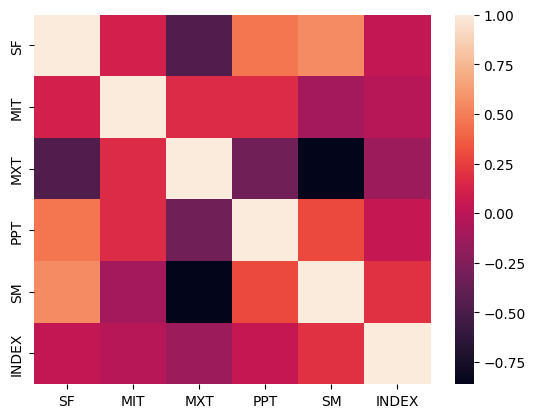

In [780]:
# plot the correlation matrix as a heatmap using seaborn
sns.heatmap(df.corr())

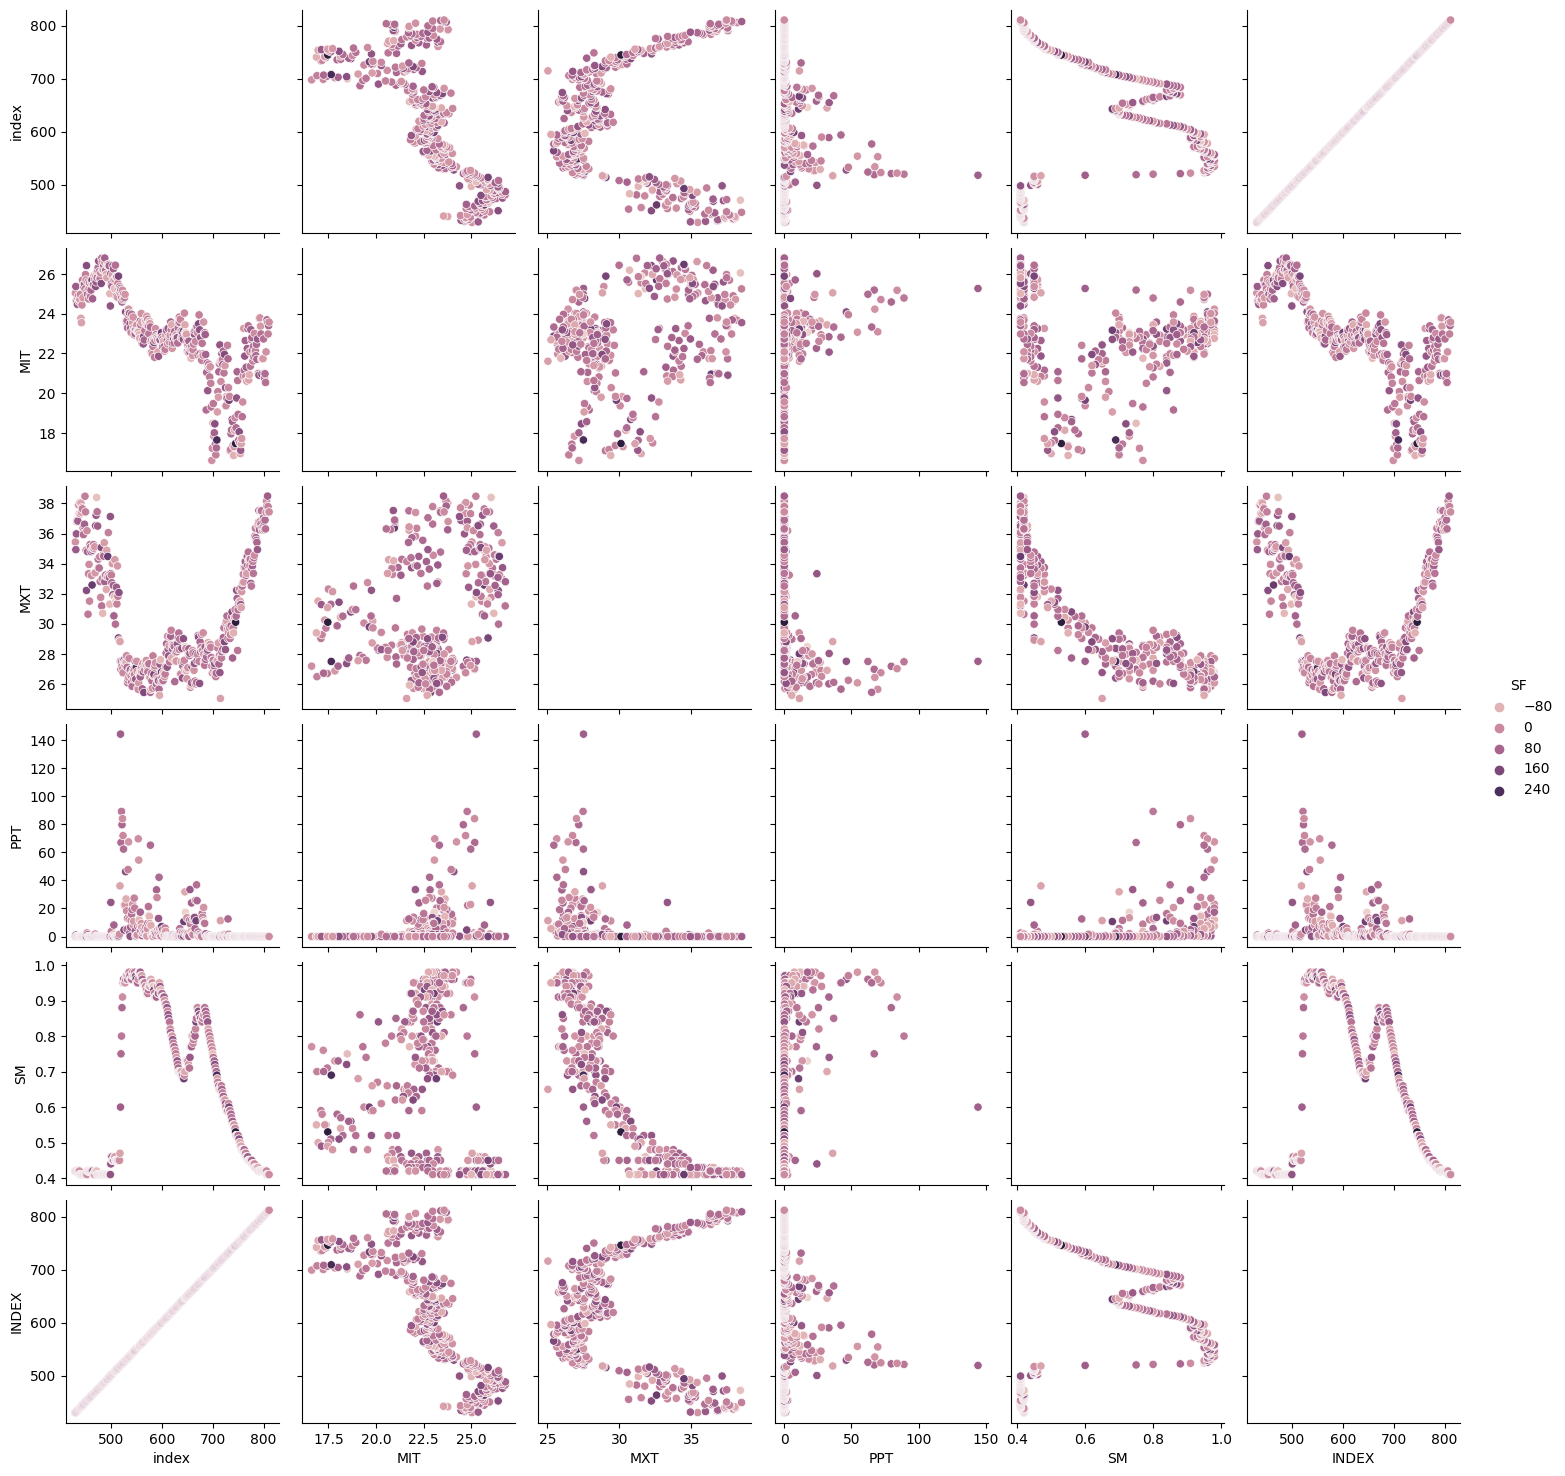

In [781]:
sns.pairplot(df1,hue="SF")

In [782]:
#count of each objects
df1["SF"].value_counts()

-18.283242     1
-7.032058      1
 113.065570    1
 101.863292    1
 73.320886     1
              ..
-26.052348     1
-6.830254      1
 76.284650     1
-13.125674     1
-1.866126      1
Name: SF, Length: 383, dtype: int64

In [783]:
df1["MIT"].value_counts()

23.55    5
23.05    4
22.73    4
22.08    4
22.80    4
        ..
22.35    1
22.55    1
21.81    1
21.86    1
23.69    1
Name: MIT, Length: 286, dtype: int64

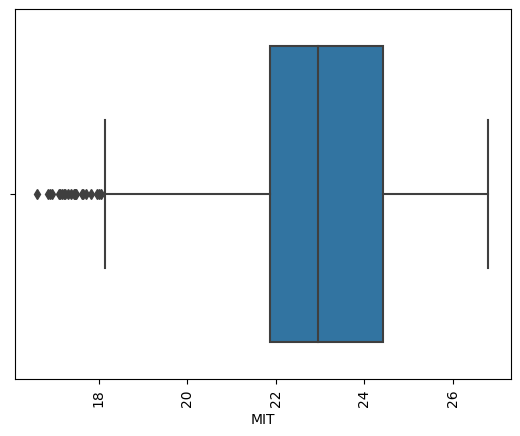

In [784]:
sns.boxplot(x="MIT",data=df1)
plt.xticks(rotation=90)
plt.show()

In [785]:
df1["MXT"].value_counts()

27.51    5
27.48    4
28.23    4
34.89    3
26.55    3
        ..
25.44    1
26.95    1
27.29    1
27.57    1
37.79    1
Name: MXT, Length: 299, dtype: int64

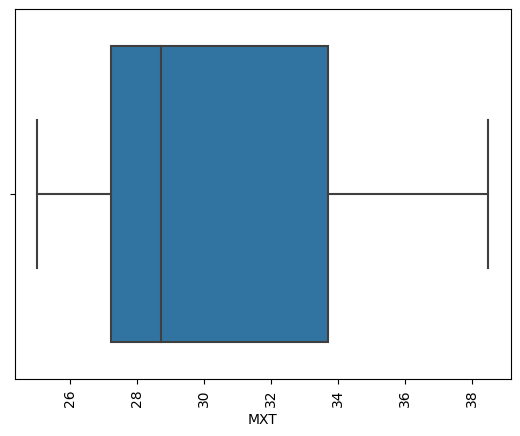

In [786]:
sns.boxplot(x="MXT",data=df1)
plt.xticks(rotation=90)
plt.show()

In [787]:
df1["PPT"].value_counts()

0.00    130
0.01     30
0.02     12
0.05      6
0.04      6
       ... 
6.51      1
0.61      1
2.37      1
2.30      1
1.62      1
Name: PPT, Length: 175, dtype: int64

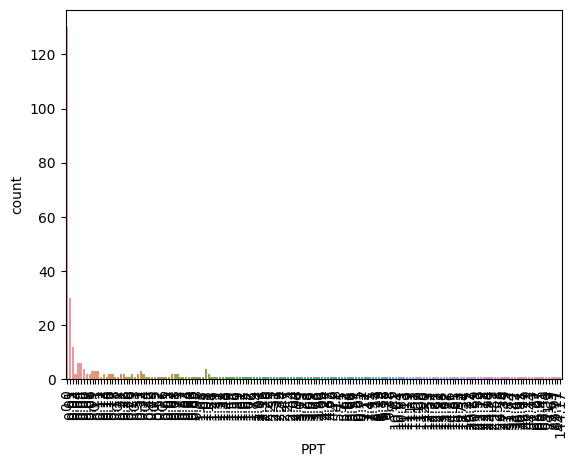

In [788]:
sns.countplot(x="PPT",data=df1)
plt.xticks(rotation=90)
plt.show()

In [789]:
df1["SM"].value_counts()

0.41    51
0.42    41
0.45    21
0.95    18
0.97    14
0.96    11
0.94    10
0.73    10
0.80    10
0.70     9
0.92     9
0.91     9
0.46     8
0.84     8
0.98     8
0.77     7
0.43     7
0.88     7
0.48     6
0.86     6
0.85     6
0.59     6
0.44     6
0.52     5
0.87     5
0.69     5
0.47     4
0.65     4
0.66     4
0.71     4
0.93     4
0.74     3
0.81     3
0.89     3
0.55     3
0.72     3
0.62     3
0.82     3
0.75     3
0.60     3
0.78     3
0.76     3
0.68     3
0.79     3
0.61     2
0.58     2
0.56     2
0.54     2
0.63     2
0.51     2
0.50     2
0.49     2
0.57     1
0.64     1
0.53     1
0.90     1
0.67     1
Name: SM, dtype: int64

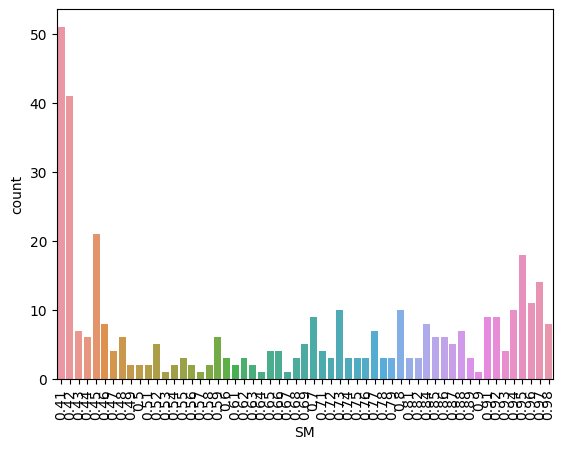

In [790]:
sns.countplot(x="SM",data=df1)
plt.xticks(rotation=90)
plt.show()

In [791]:
df["INDEX"].value_counts()

1       1
1941    1
1943    1
1944    1
1945    1
       ..
977     1
978     1
979     1
980     1
2922    1
Name: INDEX, Length: 2922, dtype: int64

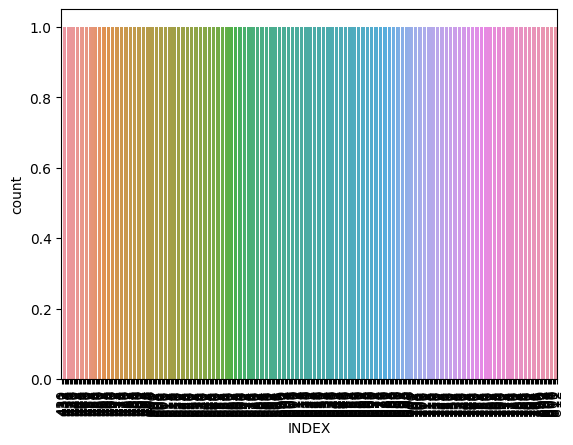

In [792]:
sns.countplot(x="INDEX",data=df1)
plt.xticks(rotation=90)
plt.show()

In [793]:
df1.columns

Index(['index', 'SF', 'MIT', 'MXT', 'PPT', 'SM', 'INDEX'], dtype='object')

In [794]:
x=df1

ELBOW POINT

In [795]:
#elbow points
from sklearn.cluster import KMeans
wcss=[] #empty list
for i in range(1,11): #i = clusters 
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [796]:
print(wcss) #varients

[11099452.079512797, 4065261.8590733735, 2761245.8189110644, 2271796.4769779826, 1903063.7239606706, 1587042.9765069932, 1365762.4260869094, 1204463.815134443, 1088673.8635987025, 981596.4660891832]


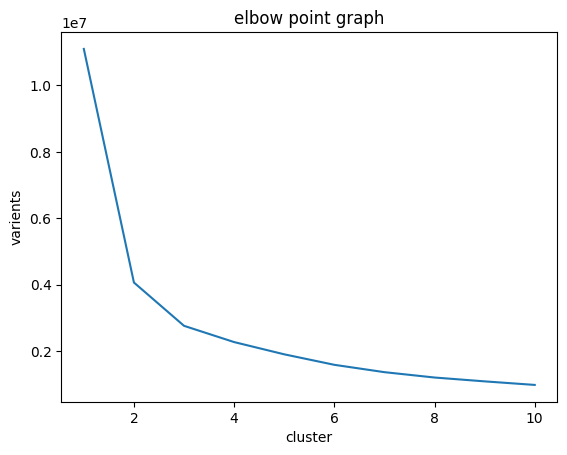

In [797]:
#elbow point graph
plt.plot(range(1,11),wcss)
plt.xlabel("cluster")
plt.ylabel("varients")
plt.title("elbow point graph")
plt.show()

In [798]:
#number of clusters = 6
Kmeans=KMeans(n_clusters=6,init='k-means++',random_state=0)
y_pred=Kmeans.fit_predict(x)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 5, 5, 2, 2, 5, 5, 2, 5, 5, 2, 2, 5, 5, 5, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 5, 5, 3, 5, 3, 5, 5, 3,
       5, 5, 5, 5, 3, 3, 5, 3, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 3, 3, 3, 5,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 1, 0, 3, 1, 1, 3, 0, 1, 0, 0, 1, 1,

In [799]:
x["cluster"]=y_pred
x

,index,SF,MIT,MXT,PPT,SM,INDEX,cluster
0,429,-18.283242,25.04,35.44,0.00,0.42,430,4
1,430,105.704645,25.37,34.93,1.03,0.42,431,2
2,431,108.976466,24.65,35.98,0.11,0.42,432,2
3,432,44.692121,24.60,36.80,0.05,0.42,433,4
4,433,99.538312,24.47,36.87,0.04,0.42,434,2
...,...,...,...,...,...,...,...,...
378,807,84.355420,23.69,37.83,0.00,0.41,808,1
379,808,96.743913,23.55,38.49,0.00,0.41,809,1
380,809,20.134039,22.98,37.79,0.00,0.41,810,1
381,810,76.420243,23.40,37.41,0.00,0.41,811,1


<Axes: xlabel='cluster', ylabel='count'>

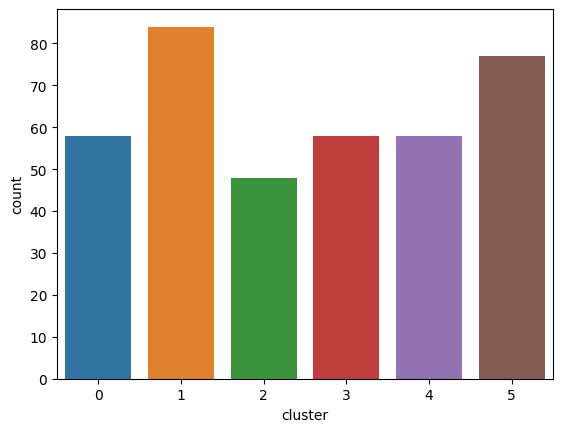

In [800]:
#count plot
sns.countplot(x="cluster",data=df1)

In [801]:
x.isna().sum()

index      0
SF         0
MIT        0
MXT        0
PPT        0
SM         0
INDEX      0
cluster    0
dtype: int64

In [802]:
x.dtypes

index        int64
SF         float64
MIT        float64
MXT        float64
PPT        float64
SM         float64
INDEX        int64
cluster      int32
dtype: object

In [803]:
#variable seperation\
a=x.iloc[:,:-1]
a

,index,SF,MIT,MXT,PPT,SM,INDEX
0,429,-18.283242,25.04,35.44,0.00,0.42,430
1,430,105.704645,25.37,34.93,1.03,0.42,431
2,431,108.976466,24.65,35.98,0.11,0.42,432
3,432,44.692121,24.60,36.80,0.05,0.42,433
4,433,99.538312,24.47,36.87,0.04,0.42,434
...,...,...,...,...,...,...,...
378,807,84.355420,23.69,37.83,0.00,0.41,808
379,808,96.743913,23.55,38.49,0.00,0.41,809
380,809,20.134039,22.98,37.79,0.00,0.41,810
381,810,76.420243,23.40,37.41,0.00,0.41,811


In [804]:
b=x.iloc[:,-1]
b

0      4
1      2
2      2
3      4
4      2
      ..
378    1
379    1
380    1
381    1
382    1
Name: cluster, Length: 383, dtype: int32

In [805]:
#training and testing data
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.30,random_state=0)
a_train.shape

(268, 7)

In [806]:
a_test.shape



(115, 7)

In [807]:
b_train

12     4
101    5
298    0
259    3
311    1
      ..
323    1
192    3
117    5
47     4
172    3
Name: cluster, Length: 268, dtype: int32

In [808]:
b_test

213    3
124    5
190    5
52     4
250    0
      ..
210    3
134    2
175    3
66     4
220    0
Name: cluster, Length: 115, dtype: int32

In [809]:
#normalisation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(a_train)
a_train=scalar.fit_transform(a_train)
a_test=scalar.fit_transform(a_test)

IMPLIMENTING RANDOM FOREST

In [810]:
#model creation
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2)
model.fit(a_train,b_train)

RandomForestRegressor(max_depth=2)

In [811]:
#predicting
ypred=model.predict(a_test)
ypred

array([2.03388912, 4.47674713, 4.47674713, 4.47674713, 0.4690945 ,
       0.4690945 , 0.50212964, 4.47674713, 1.92697647, 2.03414553,
       3.59617795, 0.4690945 , 0.65995194, 0.58660499, 4.47674713,
       4.47674713, 0.4690945 , 1.97563232, 1.94620724, 0.4690945 ,
       1.83011983, 4.31635633, 0.4690945 , 2.34138556, 4.47674713,
       2.03388912, 1.97563232, 0.50511502, 1.92697647, 0.4690945 ,
       2.03414553, 0.50511502, 4.47674713, 4.47674713, 2.34138556,
       1.97563232, 4.47674713, 0.4690945 , 4.47674713, 3.55170687,
       0.4690945 , 4.47674713, 4.47674713, 4.47674713, 0.4690945 ,
       4.47674713, 4.47674713, 2.34138556, 4.47674713, 4.47674713,
       4.47674713, 1.99486309, 2.34138556, 2.34138556, 4.47674713,
       4.47674713, 0.4690945 , 1.97563232, 0.4690945 , 0.50511502,
       4.47674713, 4.47674713, 2.34138556, 4.47674713, 0.50511502,
       1.83011983, 2.65314085, 0.50511502, 0.4690945 , 2.34138556,
       4.47674713, 1.97563232, 0.50511502, 4.04342255, 0.50511

plotting random forest

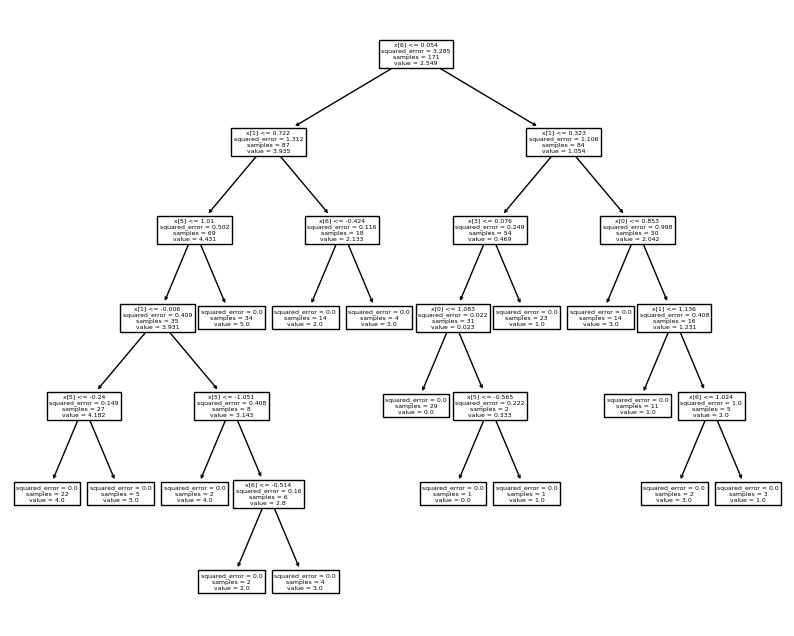

In [812]:
from sklearn.tree import plot_tree
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=10)
# Train the classifier on the dataset
clf.fit(a_train, b_train)

# Create a figure with a desired size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot a single decision tree from the random forest
plot_tree(clf.estimators_[0], ax=ax)

# Show the plot
plt.show()

PERFORMANCE EVALUATION METHODS

In [813]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(b_test,ypred)
mae

0.7119127485018982

In [814]:
#mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(b_test,ypred)
mape

306624513791705.3

In [815]:
#mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error :",mean_squared_error(b_test,ypred))

mean squared error : 0.7166435009053557


In [816]:
#root mean squared error
root=mean_squared_error(b_test,ypred)
print("root mean absolute error :",np.sqrt(root))

root mean absolute error : 0.8465479909050376


In [817]:
#r2 score ==> coefficent of detremination     
from sklearn.metrics import r2_score
print("r2 score :",r2_score(b_test,ypred))

r2 score : 0.7413598324562458


In [818]:
#creating a data frame
pd.DataFrame(data={'prediction_value': ypred,'actual_value':b_test,"error": b_test - ypred})

,prediction_value,actual_value,error
213,2.033889,3,0.966111
124,4.476747,5,0.523253
190,4.476747,5,0.523253
52,4.476747,4,-0.476747
250,0.469095,0,-0.469095
...,...,...,...
210,2.033889,3,0.966111
134,2.341386,2,-0.341386
175,2.341386,3,0.658614
66,4.476747,4,-0.476747


plotting graph using prediction_value, actual_value

In [819]:

pred=model.predict(scalar.transform([[429,3.09,25.04,35.44,0.00,0.42,430]]))
print(pred)

[4.47674713]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


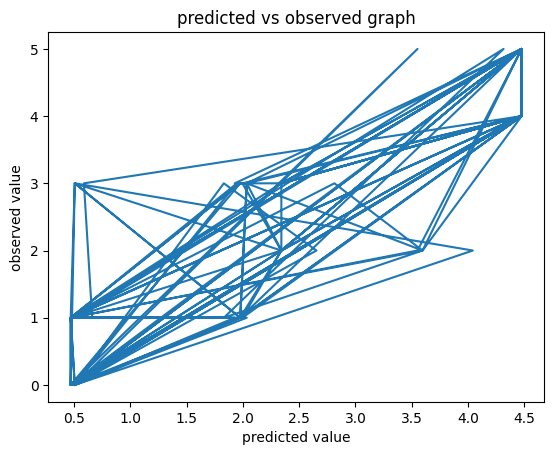

In [820]:
plt.plot(ypred,b_test)
plt.xlabel("predicted value")
plt.ylabel("observed value")
plt.title("predicted vs observed graph")
plt.show()

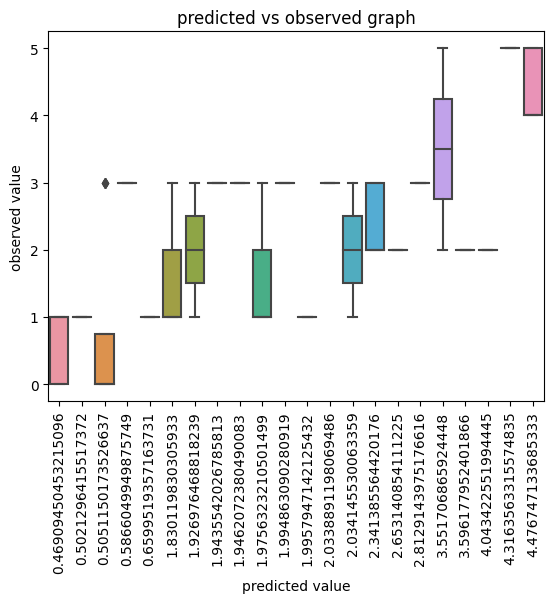

In [821]:
#plotting box plot
sns.boxplot(x=ypred,y=b_test,data=x)
plt.xlabel("predicted value")
plt.ylabel("observed value")
plt.title("predicted vs observed graph")
plt.xticks(rotation=90)
plt.show()